In [43]:
#Importar las librerias.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


Simulacion unicamente con casos confirmados 

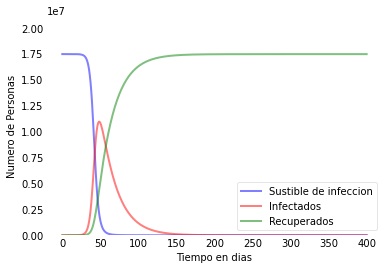

 R0=  8.4


In [45]:


# Total de la poblacion
N = 17500000
# Numero Inicial de Infectados
I0 = 6
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0
# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en 21 dias.
beta, gamma = 0.4, 1.0/21
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 400, 400)


# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados


#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')

ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Ro = beta/gamma
print(" R0= ",Ro)

Simulacion con datos de los casos confirmados y recuperados

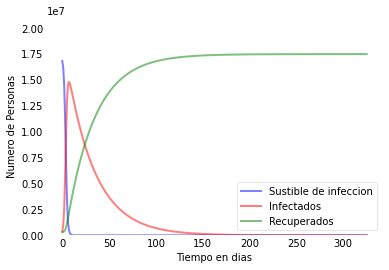

R0 =  33.0


In [46]:
# Total de la poblacion
N = 17500000
# Numero Inicial de Infectados
I0 = 361000
# Numero de Recuperados
R0 = 310000
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0
# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en 30 dias.
beta, gamma = 1.1, 1.0/30 
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 325, 325)


y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados

#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')

ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Ro = beta/gamma
print("R0 = ",Ro)

Analisis
____________

En al primera grafica donde se aprecian unicamente con los primeros casos confirmado en Ecuador, donde a su vez no existia casos recuperados, nos indica como dentro de los proximos 50 dias incrementara ese numero de infectados y es justamente lo que en la segunda grafica en base a los datos actuales tanto de los casos confirmado se nota claramente el pico de infectados que se dio durante ese tiempo
A su vez tambien decir que un poco antes de los 50  dias empezo a confirmarse casos de personas recuperadas. 

Conlusiones
____________

El aplicar medidas para la propagacion del virus es escencial como es el confinamiento, se muestra claramente como en los primeros 50 dias existe un incremento exponencial de las personas infectadas, pasado ese tiempo cuando se aplicaron las medidas de confinamiento hubo una reduccion de las personas infectadas. Se puede apreciar tambien la curva de personas recuperadas influye tambien un poco en la cantidad de personas susceptibles de infeccion.

 Referencias
 _____________

* https://www.agenciasinc.es/Reportajes/Un-modelo-un-teorema-y-teoria-de-juegos-contra-el-coronavirus
* https://rpubs.com/dsfernandez/422937
* https://towardsdatascience.com/modelling-the-coronavirus-epidemic-spreading-in-a-city-with-python-babd14d82fa2


